HR EMPLOYEE ATTRITION DATASET.

This is a fictional data set created by IBM data scientists. We need to explore the dataset, understanding the algorithms and techniques which can be applied on it. We' ll try to gain meaningful insights from the dataset, like what are the factors which have an impact on Employee Attrition.

In [17]:
#Importing our desired libraries
import numpy as np  #for linear algebra
import pandas as pd  #for data processing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt 
%matplotlib inline 

Importing the dataset and data exploration

In [18]:
data= pd.read_csv('HR_Employee_Attrition.csv')
print(data.columns)
print(data.shape)
data.head()


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


We can see that the dataset consists of 1470 rows and 35 columns(features). let us check the number of categorcial and numerical features

In [19]:
categorical_features= data.select_dtypes(include= ['object']).columns
numerical_features = data.select_dtypes(exclude=['object']).columns
print(categorical_features)
print(numerical_features)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


We have 9 categorical features in the dataset which includes our target varaible 'Attrition'.

Let us check if there any missing values in the dataset before proceeding further

In [20]:
print(data.isnull().values.any())

False


We dont have any missing values in our dataset.

Now let us explore the relationship of our target variable 'Attrition' with other variables

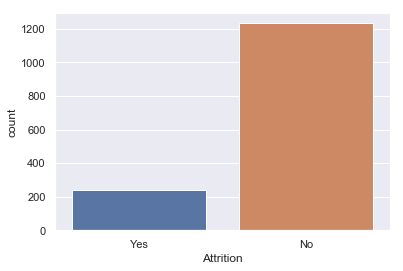

In [21]:
sns.countplot('Attrition', data=data)
plt.show()

In [22]:
Percentage_Attrition = data.Attrition.value_counts()/data.Attrition.count()
print(Percentage_Attrition)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


The above plot shows the distribution of our target variable Attrition. It shows the attrition (minority class) consists 16% of our entire sample. We can see the imbalanced distribution. We will have to balance the dataset before developing our model.In this case, we are interested in identifying  the factors that lead to employee attrition(the minority class).

Let us see the correlation of our target varaible with other numerical variables

Text(0.5, 1.0, 'Correlation map')

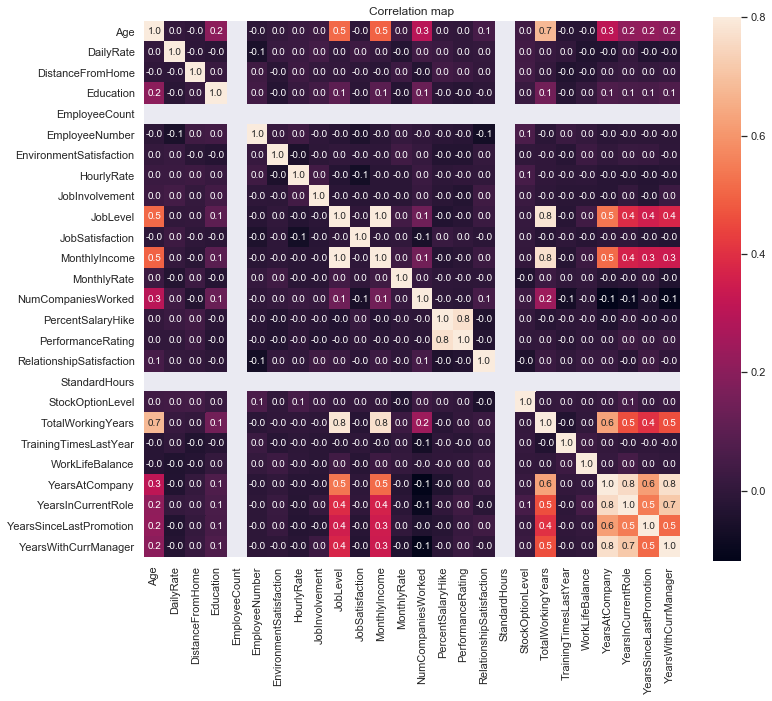

In [23]:
correlation_matrix = data.corr()
f, ax = plt.subplots(figsize= (12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', vmax=.8, square=True)
plt.title('Correlation map')

The correlation matrix above shows the statistical relationship between the features. The performance of the model can deterirorate if two variables higher correlated with each other (multicollinearity). We can see that most of the features are unrelated to each other. However, we can see stron correlation among the features 'PercentSalaryHike' and 'Performance rating'. Also, 'TotalWorking' years has strong correlation with 'Joblevel' and 'MonthlyIncome' 

Now, let us  see the relationship of some features which might have role in employee attrition

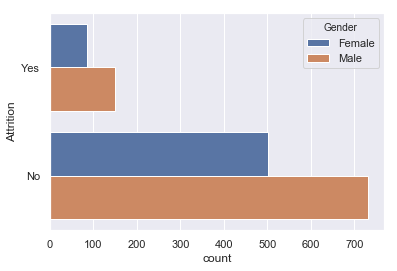

In [24]:
#Let us see who are more likely to have attrition if we consider gender as the factor
sns.countplot(y= 'Attrition', hue='Gender', data=data)
plt.show()

We can see that more number of men are likley for Attrition compared to women.

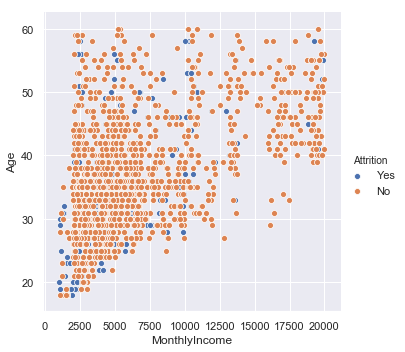

In [25]:
sns.pairplot(data=data,x_vars=['MonthlyIncome'], 
             y_vars=['Age'],height=5, hue='Attrition')

We can see that employees with Monthly income less than 7500 have more Attrition since the blue dots are more concentrated at that region.

C:\Users\18644\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


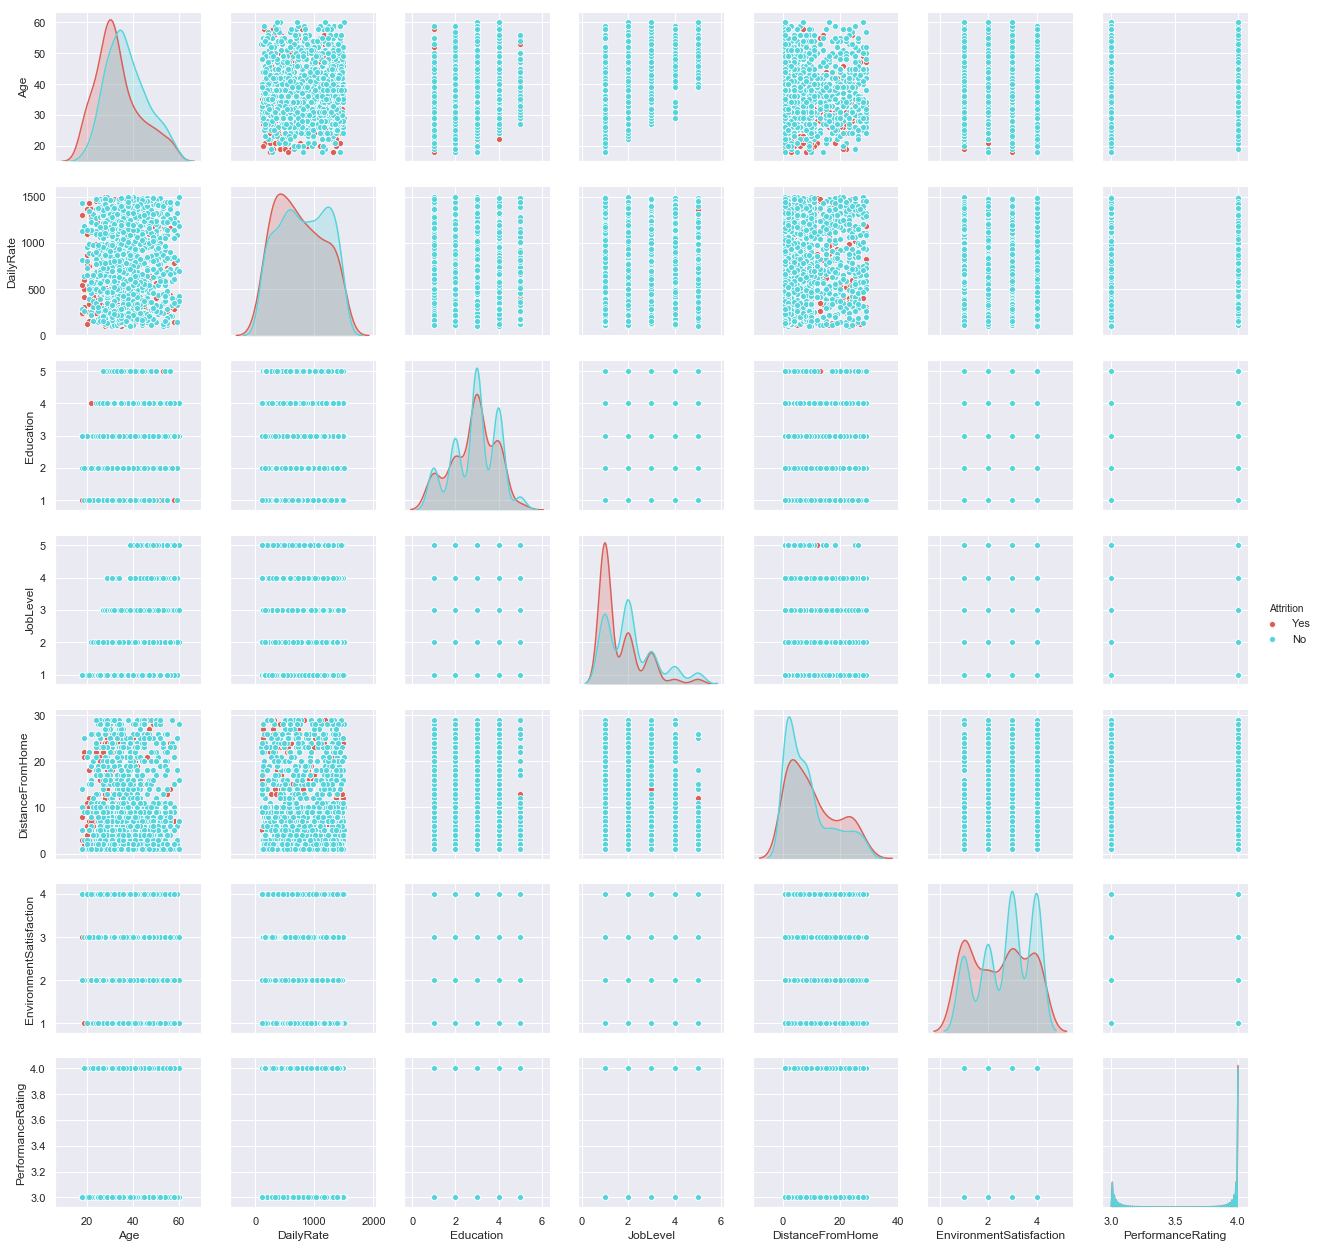

In [26]:
sns.set()
columns=['Age','DailyRate','Education','JobLevel','DistanceFromHome','EnvironmentSatisfaction','PerformanceRating','Attrition']
sns.pairplot(data[columns],hue='Attrition',height=2.5,palette="hls")

We can see employess in the lower age group are more likely to have attrition.

Employees living less than 20(minutes?)distance from the home have higher attrition

Employees with lower level of environmental satisfaction seems to have higher attrition

Employees with job level(<4) seems to have higher attrition


Now let us convert our target variable 'Attrition' to numerical form

In [27]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

Let us develop the  features and target to fit the model. We are also using 'pd.get_dummies' to get dummy variable of the categorical features.

In [28]:
features = pd.get_dummies(data.drop(columns=['Attrition','DailyRate','MaritalStatus','Over18','StandardHours','EmployeeCount','EmployeeNumber']))
target = data['Attrition']

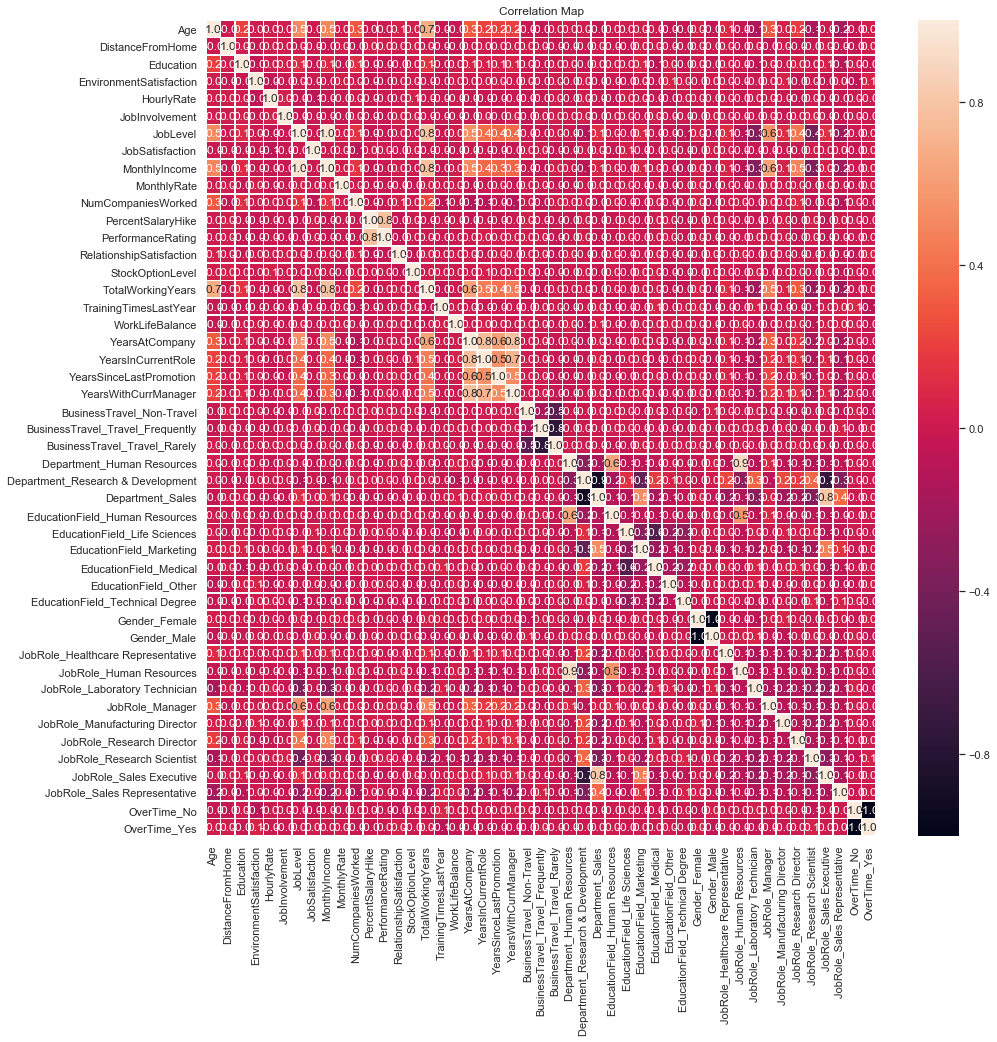

In [29]:
#Correlation map of our features for training our models
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(features.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
Age                                  1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1

Now lets import the train_test_split method to Split arrays or matrices into random train and test subsets.


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 47)
(441, 47)
(1029,)
(441,)


As we saw that there is class imbalane problem in our dataset for which we are going to solve the class imbalance problem.Since we are interested in minority class(Attrition) for which we will have to oversample the minority class.
We are using SMOTE to oversample due to the skewness in target

In [32]:
#Let us import SMOTE to upsample the dataset
from imblearn.over_sampling import SMOTE


In [33]:
oversampler= SMOTE(random_state=0)
smote_X_train, smote_y_train = oversampler.fit_sample(X_train, y_train)
                                                

RANDOM FOREST CLASSIFIER

The Random Forest method can be grouped under the category of ensemble models.The building block of a Random Forest is the ubiquitous Decision Tree. The decision tree as a standalone model is often considered a "weak learner" as its predictive performance is relatively poor. However a Random Forest gathers a group (or ensemble) of decision trees and uses their combined predictive capabilities to obtain relatively strong predictive performance - "strong learner".
Let us define the set of paratmeters that will feed into our Random Forest Classifier model.

In [34]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'random_state' : seed,
    'verbose': 0
}

In [35]:
#Importing libraries for our model
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier




Now we can initialise a Random Forest object by using scikit-learn's RandomForestClassifier and unpacking the parameters by adding the double asterisks symbol

In [36]:
#Fitting the model 
rfm = RandomForestClassifier(** rf_params)
rfm.fit(smote_X_train, smote_y_train)
rfm_predictions = rfm.predict(X_test)


Scoring the model

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy Score for Random Forest Model: {}".format(accuracy_score(y_test, rfm_predictions)))
print(classification_report(y_test, rfm_predictions))


Accuracy Score for Random Forest Model: 0.8231292517006803
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       373
           1       0.42      0.40      0.41        68

   micro avg       0.82      0.82      0.82       441
   macro avg       0.66      0.65      0.65       441
weighted avg       0.82      0.82      0.82       441



Let us compute a confusion matrix to evaluate the accuracy of our classification

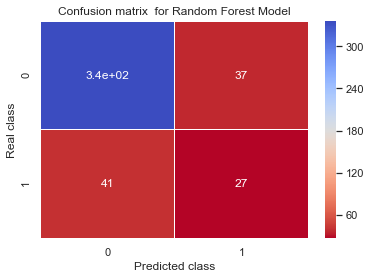

In [38]:
Confusion_matrix = confusion_matrix(y_test, rfm_predictions)
sns.heatmap(Confusion_matrix,
           cmap= 'coolwarm_r',
           annot = True,
           Linewidths = 0.5
)
plt.title('Confusion matrix  for Random Forest Model')
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.show()

Accuracy of the model

As observed, our Random Forest returns an accuracy of approx 81% for its predictions and on first glance this seems to be a pretty good performing model. However when we think about how skewed our target variable where the distribution of yes and no's are 84% and 16%, therefore our model is only predicting slightly better than random guessing.
It would be more informative to balance out the precision and recall scores as shown in the classification report outputs. 

Feature Ranking via the Random Forest

The Random Forest classifier in Sklearn also contains a very convenient attribute feature importances which tells us which features within our dataset has been given most importance through the Random Forest algorithm. Shown below is a bar diagram of the various important features.

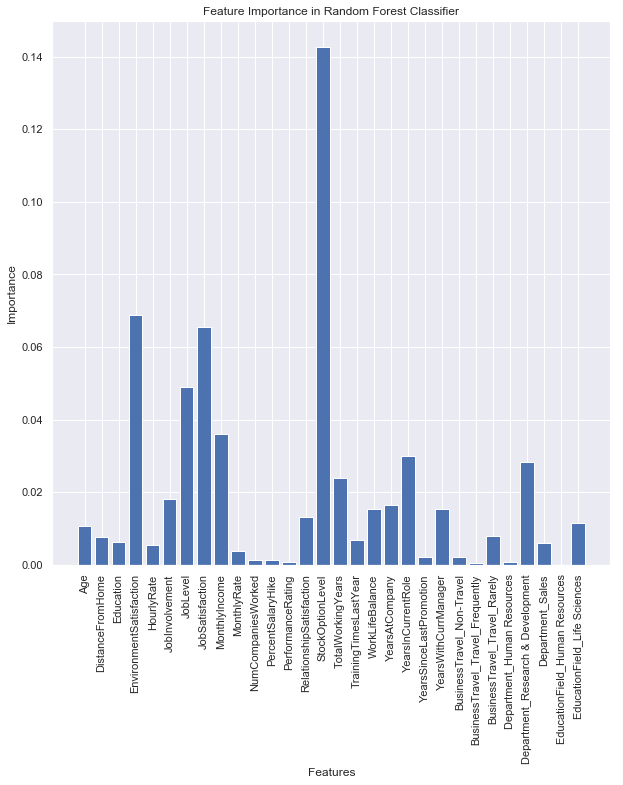

In [39]:
plt.figure(figsize=(10,10))
plt.bar(features.columns[0:30], rfm.feature_importances_[0:30])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

Visualising Tree Diagram with Graphviz
Let us now visualise how a single decision tree traverses the features in our data.The DecisionTreeClassifier object of sklearn comes with a very convenient export_graphviz method that exports the tree diagram into a .png format which we can view from the output of this kernel.

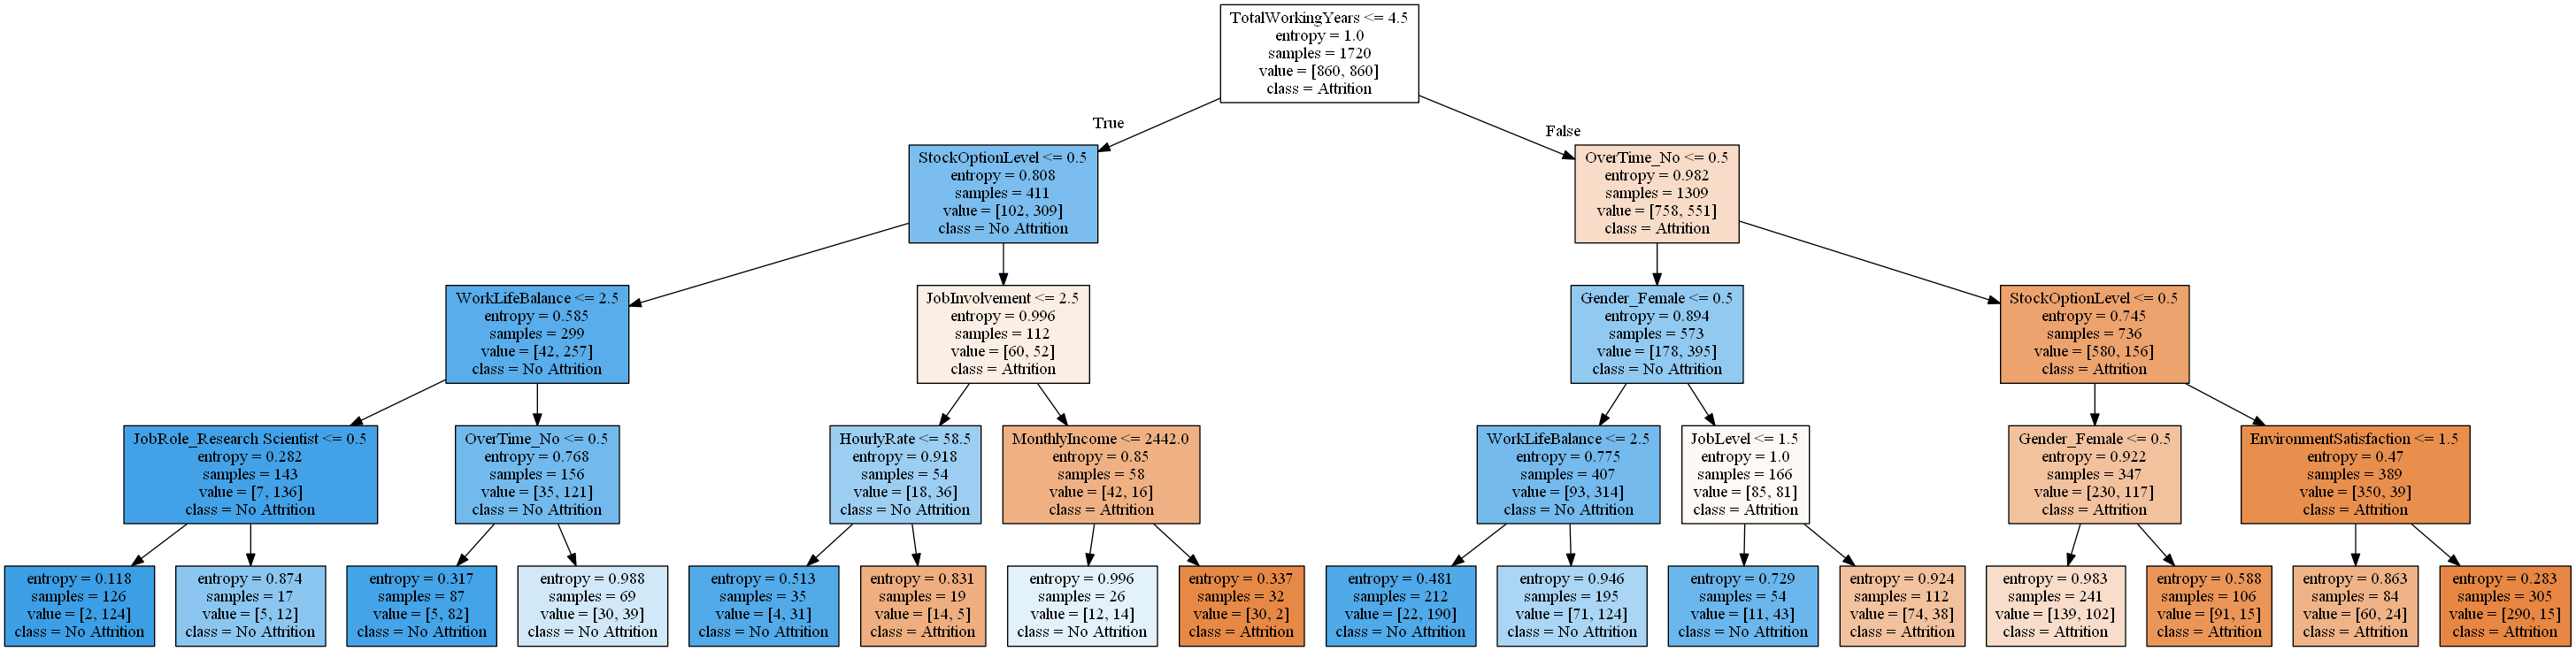

In [40]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=0.3,
    max_depth=4,
    random_state = 0
)
decision_tree.fit(smote_X_train, smote_y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features.columns,
    class_names=['Attrition', 'No Attrition'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

GRADIENT BOOSTING MODEL

Gradient Boosted Classifier
Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that we want to minimise and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).

Initialising Gradient Boosting Parameters

Let us set the paramaters to fit into our Gradient Bossting Classifier

In [41]:
gbc_params = {
    'n_estimators': 1000, 
    'learning_rate': 0.01,
    'max_depth': 4,
    'random_state' : 0,
    'verbose': 0
}

In [42]:
#Importing our package and fitting the model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(**gbc_params)
gbc.fit(smote_X_train, smote_y_train)
gbc_predictions = gbc.predict(X_test)

Scoring the model

In [43]:
print("Accuracy Score for Gradient Boosting Classifier: {}".format(accuracy_score(y_test, gbc_predictions)))
print(classification_report(y_test, gbc_predictions))

Accuracy Score for Gradient Boosting Classifier: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       373
           1       0.52      0.37      0.43        68

   micro avg       0.85      0.85      0.85       441
   macro avg       0.71      0.65      0.67       441
weighted avg       0.83      0.85      0.84       441



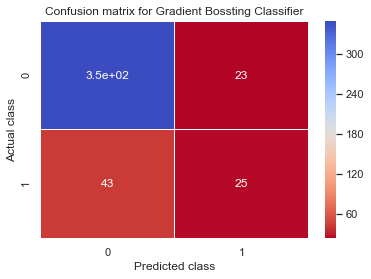

In [44]:
Confusion_matrix =confusion_matrix(y_test, gbc_predictions)
sns.heatmap(Confusion_matrix,
           cmap = 'coolwarm_r',
           annot = True,
           linewidths = 0.5)
plt.title('Confusion matrix for Gradient Bossting Classifier')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

Fature Ranking via Gradient Boosting Classifier

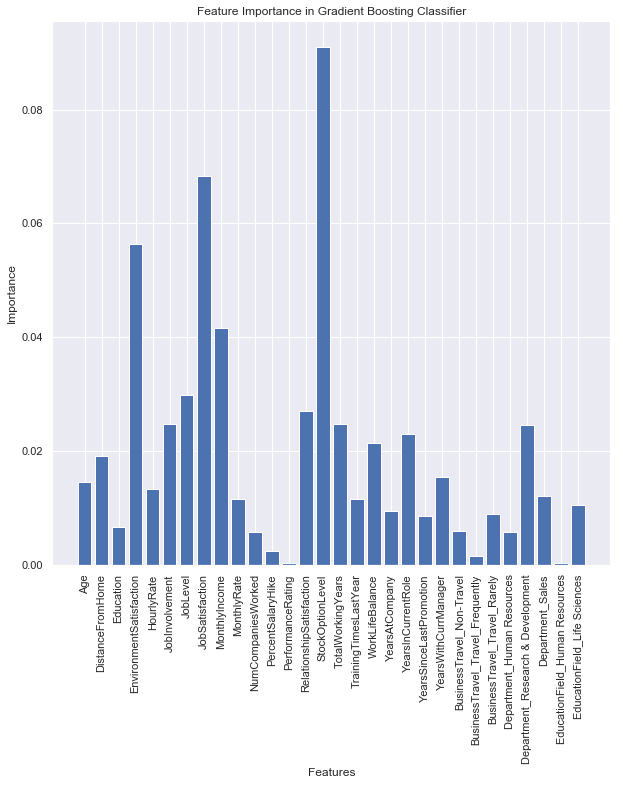

In [45]:
plt.figure(figsize=(10,10))
plt.bar(features.columns[0:30], gbc.feature_importances_[0:30])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()

Grid Search to see if we can get an improved model

In [46]:
from sklearn.model_selection import GridSearchCV

In [56]:
rfm = RandomForestClassifier(random_state = 50)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
     'criterion' :['gini', 'entropy']
 
}

In [57]:
CV_rfm = GridSearchCV(estimator = rfm, param_grid=param_grid, cv= 5)
CV_rfm.fit(smote_X_train, smote_y_train)
rfc_predictions = CV_rfm.predict(X_test)

In [58]:
CV_rfm.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

Lets fit the Random forest model will the best parameters

In [59]:
rfm1 = RandomForestClassifier(random_state = 50, max_features = 'log2',n_estimators = 500, max_depth = 8, criterion = 'gini')
rfm1.fit(smote_X_train, smote_y_train)
rfm1_predictions = rfm1.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy Score for Random Forest Model with best Parametrs: {}".format(accuracy_score(y_test, rfm1_predictions)))
print(classification_report(y_test, rfm1_predictions))


Accuracy Score for Random Forest Model with best Parametrs: 0.8594104308390023
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       373
           1       0.57      0.35      0.44        68

   micro avg       0.86      0.86      0.86       441
   macro avg       0.73      0.65      0.68       441
weighted avg       0.84      0.86      0.85       441



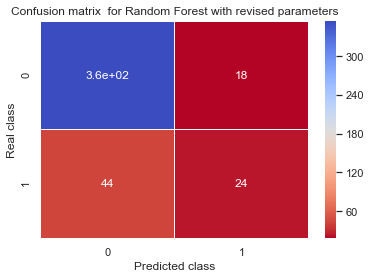

In [61]:
Confusion_matrix = confusion_matrix(y_test, rfm1_predictions)
sns.heatmap(Confusion_matrix,
           cmap= 'coolwarm_r',
           annot = True,
           Linewidths = 0.5
)
plt.title('Confusion matrix  for Random Forest with revised parameters')
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.show()

CONCLUSION
We have identified a simple pipeline of prediciting employee attrition from basic Exploratory Data Analysis, feature engineering and implementing two learning models; Random Forest Classifier and Gradient Boosting Classifier. The feature importance diagram shows similar predictors (StockOptionLevel, JobInvolvement, JobSatisfaction) playing important role in    attrition.